<a href="https://colab.research.google.com/github/E1250/CNN-CV_Projects_CaseStudy/blob/main/Deep_CNN_IMG_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Creating Deep CNN Image Classifier to Classify any image
this is a Youtube Video Course by - Nicolas Renotte - one of the best Youtube channels - https://www.youtube.com/watch?v=jztwpsIzEGc
we will use `TensorFlow` , and the repository main link is - https://github.com/nicknochnack/ImageClassification
: 
**Lets Get Started** 

###1. Setup and Load Data

###1.1 Install Dependencies and Setup


In [ ]:
!pip install tensorflow tensorflow-gpu opencv-python matplotlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  error: subprocess-exited-with-error
  
  × python setup.py bdist_wheel did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  ERROR: Failed building wheel for tensorflow-gpu
  Running setup.py clean for tensorflow-gpu
Failed to build tensorflow-gpu
  error: subprocess-exited-with-error
  
  × Running setup.py install for tensorflow-gpu did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Running setup.py install for tensorflow-gpu ... error
error: legacy-install-failure

× Encountered error while trying to install package.
╰─> tensorflow-gpu

note: This is an issue with the package mentioned above, not pip.
hint: See above for outpu

In [ ]:
!pip list

Package                       Version
----------------------------- --------------------
absl-py                       1.4.0
aeppl                         0.0.33
aesara                        2.7.9
alabaster                     0.7.13
albumentations                1.2.1
altair                        4.2.2
argon2-cffi                   21.3.0
argon2-cffi-bindings          21.2.0
arviz                         0.12.1
astor                         0.8.1
astropy                       4.3.1
astunparse                    1.6.3
atomicwrites                  1.4.1
attrs                         22.2.0
audioread                     3.0.0
autograd                      1.5
Babel                         2.12.1
backcall                      0.2.0
backports.zoneinfo            0.2.1
beautifulsoup4                4.6.3
bleach                        6.0.0
blis                          0.7.9
bokeh                         2.4.3
branca                        0.6.0
bs4                           0.0.1
CacheC

In [ ]:
import tensorflow as tf
import os

os.path.join('data','happy') # Just for Explaining and testing

'data/happy'

In [ ]:
# Setting device
"""To use all the vram of the machine"""
"""this is important to Avoid OOM (Out Of Memory) by setting GPU memory Consumption Growth"""
gpus = tf.config.experimental.list_physical_devices('gpu') # Returning all available GPUs, you can also set `cpu`
for gpu in gpus:
  tf.config.experimental.set_memory_growth(gpu,True)

len(gpus)

0

###1.2 Remove dodgy Images
After getting needed data from the web, Now we need to make sure that they all are working and delete nonworking images 

In [ ]:
import cv2 as cv
import imghdr # check the file extension
import matplotlib.pyplot as plt

In [ ]:
data_dir = "/content/data"
image_exts = ['jpeg','jpg','png','bmp'] # Allowed Extension
os.listdir(data_dir)

['sad', 'happy']

In [ ]:
os.listdir(os.path.join(data_dir,'happy'))[:10] # this line will list all files in `happy` folder

['images27.jpg',
 'happy-business-man-woman-jumping-260nw-168748874.jpg',
 '05-12-21-happy-people.jpg',
 'images25.jpg',
 'getty_107808336_9708069704500170_50554.jpg',
 'images49.jpg',
 'friends_190412.jpg',
 'image16.jpeg',
 'ipsos-global-advisor-happiness-2022-opti.jpg',
 'images3.jpg']

In [ ]:
for image_class in os.listdir(data_dir):
  for image in os.listdir(os.path.join(data_dir,image_class)):
    image_path = os.path.join(data_dir,image_class,image)
    try:
      img = cv.imread(image_path)
      tip = imghdr.what(image_path)
      if tip not in image_exts:
        print("Image not in ext list {}".format(image))
        os.remove(image_path)
    except Exception as e:
      print("Issue with image {}".format(image_path))
      # os.remove(image_path)

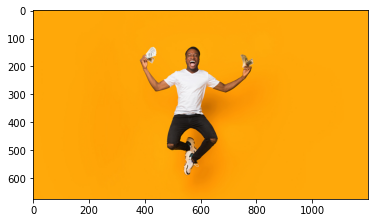

In [ ]:
plt.imshow(cv.cvtColor(img,cv.COLOR_BGR2RGB));